***EMPLOYEES*** **BURNOUT** ***ANALYSIS*** ***AND*** ***PREDICTOR*** ***USING*** ***REGRESSION*** ***ALGORITHM***



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
burnoutDf=pd.read_excel('/content/drive/MyDrive/Om/employee_burnout_analysis (1).xlsx')
burnoutDf


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
16378,fffe3800350036003000,2008-06-11,Female,Product,Yes,0,NaN,0.4,0.00
16379,fffe31003400320038003700,2008-07-01,Female,Service,No,4,6.0,7.3,0.64
16380,fffe32003000340033003200,2008-01-17,Female,Service,Yes,0,2.0,2.2,0.14
16381,fffe31003500330036003900,2008-08-19,Male,Service,Yes,4,8.0,NaN,NaN


In [ ]:
#convert into date time and data type
burnoutDf["Date of joining"]= pd.to_datetime(burnoutDf["Date of Joining"])

In [ ]:
#give the number of rows and columns
burnoutDf.shape

(16383, 10)

In [ ]:
#general information
burnoutDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           16383 non-null  object        
 1   Date of Joining       16383 non-null  datetime64[ns]
 2   Gender                16383 non-null  object        
 3   Company Type          16383 non-null  object        
 4   WFH Setup Available   16383 non-null  object        
 5   Designation           16383 non-null  int64         
 6   Resource Allocation   15358 non-null  float64       
 7   Mental Fatigue Score  14834 non-null  float64       
 8   Burn Rate             15570 non-null  float64       
 9   Date of joining       16383 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
#show top 5 rows
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of joining
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,2008-09-30
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,2008-11-30
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,2008-03-10
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,2008-11-03
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,2008-07-24


In [ ]:
#a extract all columns of the dataset
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Date of joining'],
      dtype='object')

In [ ]:
#check for null values
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1025
Mental Fatigue Score    1549
Burn Rate                813
Date of joining            0
dtype: int64

In [ ]:
#check the duplicate values
burnoutDf.duplicated().sum()

0

In [ ]:
#calclulate the mean,std,min,max and count of every attribute
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,16383.000000,15358.000000,14834.000000,15570.000000
mean,2.179271,4.477276,5.724053,0.451801
std,1.136365,2.049329,1.924383,0.198740
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:

#show the unique values
for i, col in enumerate(burnoutDf.columns):
    print(f"\n\n{burnoutDf[col].unique()}")
    print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe32003000340033003200'
 'fffe31003500330036003900' 'fffe32003000370033003800']

fffe32003000360033003200    1
fffe31003200380036003900    1
fffe3600340030003700        1
fffe3900350036003000        1
fffe3700380035003600        1
                           ..
fffe3500360031003700        1
fffe31003400340030003600    1
fffe3300390035003800        1
fffe33003100350031003900    1
fffe32003000370033003800    1
Name: Employee ID, Length: 16383, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000

In [ ]:
#drop irrelevant column
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [ ]:
# check the skewness of the attributes
intFloatburnoutDf=burnoutDf.select_dtypes([np.int,np.float])
for i,col in enumerate(intFloatburnoutDf.columns):
  if(intFloatburnoutDf[col].skew()>=0.1):
    print("\n",col,"feature is positively skewed and value is :",intFloatburnoutDf[col].skew())
  elif(intFloatburnoutDf[col].skew()<= -0.1):
     print("\n",col,"feature is negatively skewed and value is :",intFloatburnoutDf[col].skew())
  else:
     print("\n",col,"feature is normally distributed and value is :",intFloatburnoutDf[col].skew())




 Designation feature is positively skewed and value is : 0.10623292328500737

 Resource Allocation feature is positively skewed and value is : 0.21335316380275063

 Mental Fatigue Score feature is negatively skewed and value is : -0.4310412126036031

 Burn Rate feature is normally distributed and value is : 0.050913615426156106


In [ ]:
 #Replace the null values with mean
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].
mean(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].
mean(),inplace=True)
burnoutDf['Burn Rate'].fillna(burnoutDf['Burn Rate'].mean(),inplace=True)

In [ ]:
#check for null values
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
Date of joining         0
dtype: int64

In [ ]:
#show the correlation
burnoutDf.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.850715,0.657675,0.718851
Resource Allocation,0.850715,1.000000,0.739847,0.809579
Mental Fatigue Score,0.657675,0.739847,1.000000,0.878545
Burn Rate,0.718851,0.809579,0.878545,1.000000


**DATA** **VISUALIZATION**

In [ ]:
#Plotting Heat map to check Correlation
Corr=burnoutDf.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig = px.imshow(Corr, text_auto=True, aspect="auto")
fig.show()

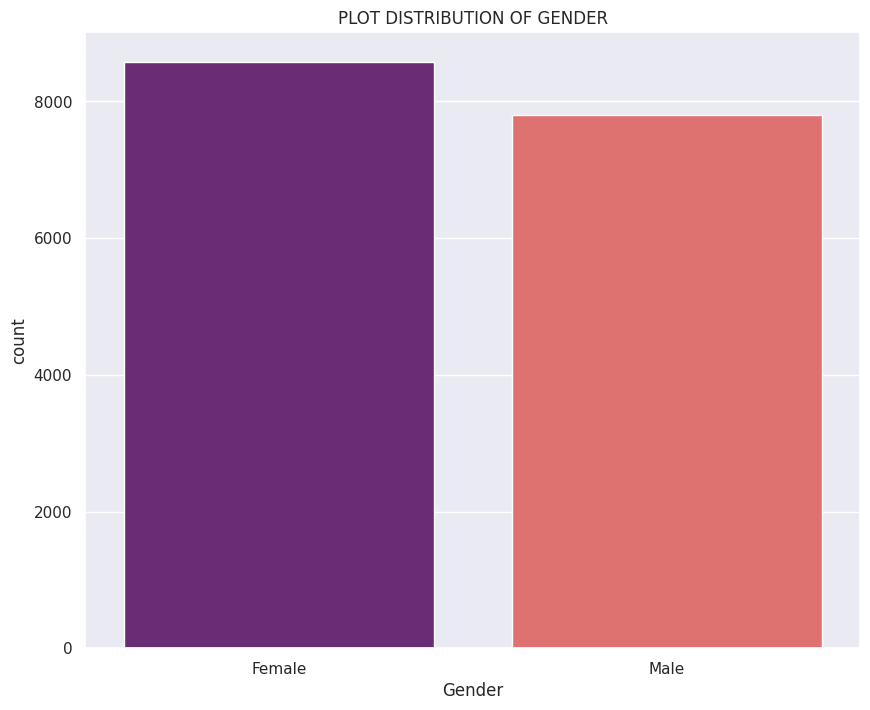

In [ ]:
#count plot distribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=burnoutDf, palette="magma")
plt.title("PLOT DISTRIBUTION OF GENDER")
plt.show()

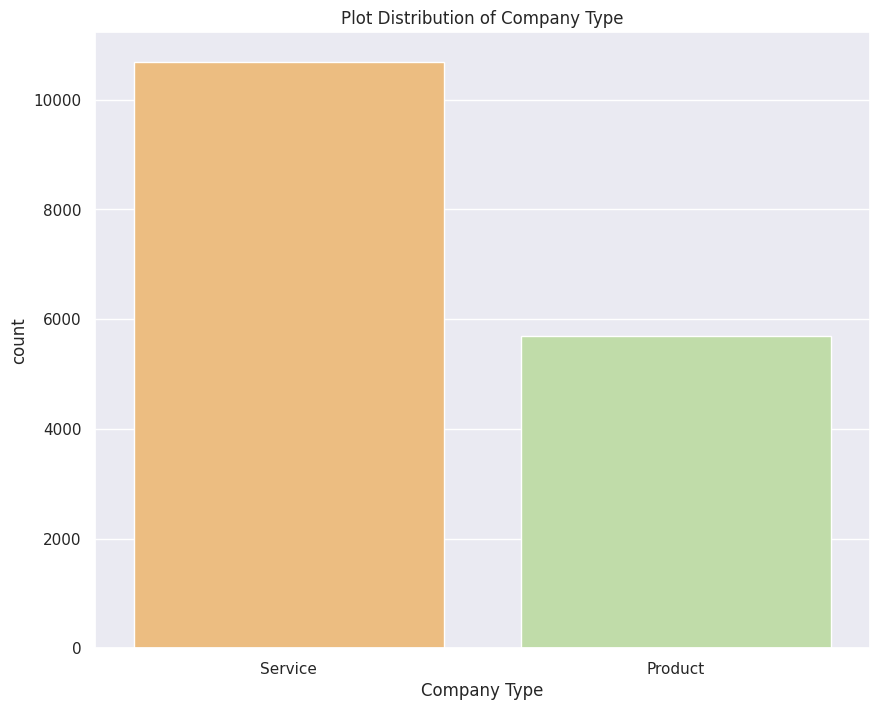

In [ ]:
#count plot distribution of "company type"
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=burnoutDf, palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

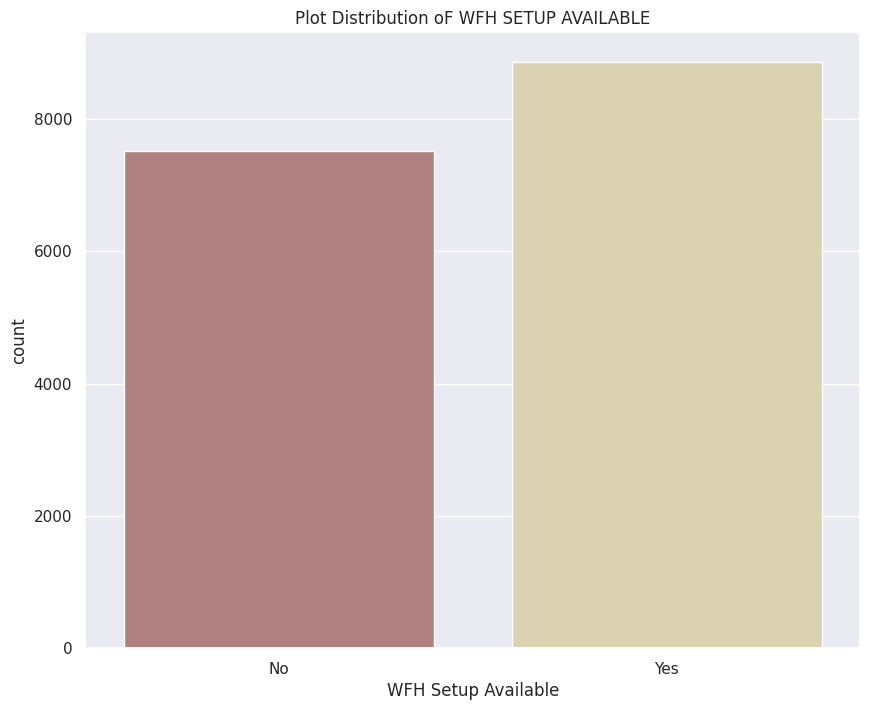

In [ ]:
#count plot distribution of "WFH SETUP"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=burnoutDf, palette="pink")
plt.title("Plot Distribution oF WFH SETUP AVAILABLE")
plt.show()

In [ ]:
#count plot distribution of attributes wiyh the help pf histogram
burn_st=burnoutDf.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int,float])
for i,col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st,x=col,title="Plot Distribution of "
   +col,color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
#plot distribution of burnrate on the basis of Designation
fig = px.line(burnoutDf, y="Burn Rate",color="Designation", title="Burnrate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#plot distribution of mental fatigue score on the basis of Designation
fig = px.line(burnoutDf,y="Mental Fatigue Score",color="Designation",title="Mental Fatigue vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'hovertemplate': 'Designation=2<br>index=%{x}<br>Mental Fatigue Score=%{y}<extra></extra>',
              'legendgroup': '2',
              'line': {'color': 'rgb(251,180,174)', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '2',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([    0,     2,     5, ..., 16361, 16362, 16363]),
              'xaxis': 'x',
              'y': array([3.8, 5.8, 3.6, ..., 7.2, 7.2, 5.5]),
              'yaxis': 'y'},
             {'hovertemplate': 'Designation=1<br>index=%{x}<br>Mental Fatigue Score=%{y}<extra></extra>',
              'legendgroup': '1',
              'line': {'color': 'rgb(179,205,227)', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '1',
              'showlegend': True,
              'type': 'scattergl

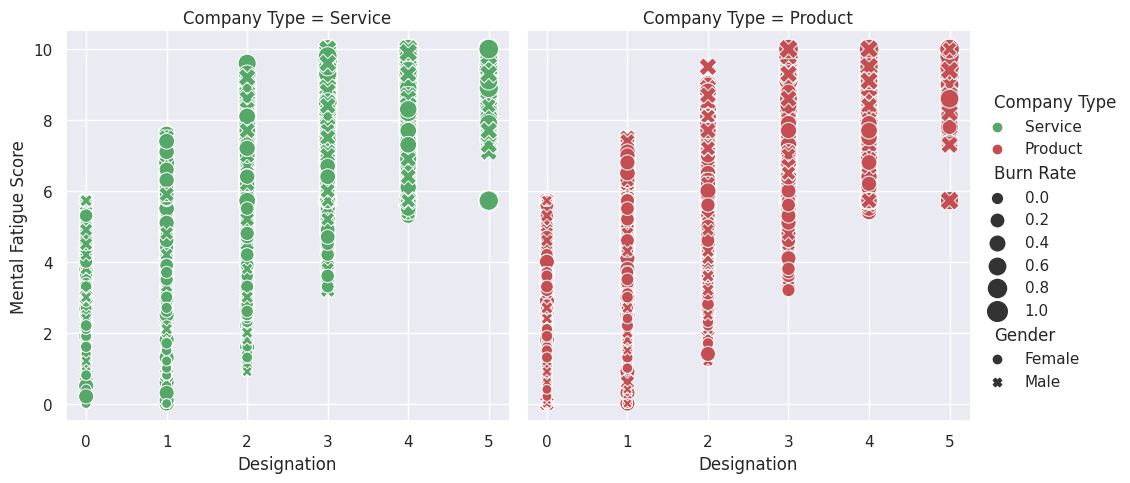

In [ ]:
#plot distribution of "Designation vs mental fatigue " as per Company type,Burnrate and Gender
sns.relplot(
data=burnoutDf, x="Designation", y="Mental Fatigue Score",col="Company Type",
hue="Company Type", size="Burn Rate", style="Gender",
palette=["g","r"], sizes=(50,200)
)

**LABEL** **ENCODING**

In [ ]:
#label encoding and assign in new variable
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()

In [ ]:
#Assign in new variable
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company TypeLabel'] = Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH_Setup_AvailableLabel'] = Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)

In [ ]:
#check assigned values
gn = burnoutDf.groupby('Gender')
gn = gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
#check assigned values
ct = burnoutDf.groupby('Company Type')
ct = ct['Company TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company TypeLabel, dtype: int64

In [ ]:
#check assigned values
wsa = burnoutDf.groupby('WFH Setup Available')
wsa = wsa['WFH_Setup_AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [ ]:
#show last 10 rows
burnoutDf.tail(10)


,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of joining,GenderLabel,Company TypeLabel,WFH_Setup_AvailableLabel
16373,2008-12-28,Female,Service,No,3,4.477276,6.700000,0.510000,2008-12-28,0,1,0
16374,2008-01-17,Female,Service,No,4,7.000000,7.300000,0.590000,2008-01-17,0,1,0
16375,2008-03-23,Female,Service,No,3,6.000000,6.400000,0.530000,2008-03-23,0,1,0
16376,2008-08-30,Female,Product,No,5,9.000000,8.600000,0.890000,2008-08-30,0,0,0
16377,2008-02-24,Male,Service,Yes,1,3.000000,5.900000,0.520000,2008-02-24,1,1,1
16378,2008-06-11,Female,Product,Yes,0,4.477276,0.400000,0.000000,2008-06-11,0,0,1
16379,2008-07-01,Female,Service,No,4,6.000000,7.300000,0.640000,2008-07-01,0,1,0
16380,2008-01-17,Female,Service,Yes,0,2.000000,2.200000,0.140000,2008-01-17,0,1,1
16381,2008-08-19,Male,Service,Yes,4,8.000000,5.724053,0.451801,2008-08-19,1,1,1
16382,2008-11-21,Female,Service,Yes,3,4.000000,4.700000,0.420000,2008-11-21,0,1,1


**FEATURE** **SELECTION**

In [ ]:
# feature selections
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score',
'GenderLabel', 'Company TypeLabel', 'WFH_Setup_AvailableLabel']
X=burnoutDf[Columns]
y=burnoutDf['Burn Rate']

In [ ]:
print(X)


       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.477276              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
16378            0             4.477276              0.400000            0   
16379            4             6.000000              7.300000            0   
16380            0             2.000000              2.200000            0   
16381            4             8.000000              5.724053            1   
16382            3             4.000000              4.700000            0   

       Company TypeLabel  WFH_Setup_AvailableLabel  
0         

In [ ]:
print(y)

0        0.160000
1        0.360000
2        0.490000
3        0.200000
4        0.520000
           ...   
16378    0.000000
16379    0.640000
16380    0.140000
16381    0.451801
16382    0.420000
Name: Burn Rate, Length: 16383, dtype: float64


**IMPLEMENTING** **PCA**

In [ ]:
#PRINCIPLE COMPONENT ANALYSIS
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
print("PCA shape of X is:",X_pca.shape,"and original shape is:",X.shape)
print("% of importance of selected features is:",pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)

PCA shape of X is: (16383, 4) and original shape is: (16383, 6)
% of importance of selected features is: [0.78386568 0.11076252 0.03084856 0.02623618]
The number of features selected through PCA is: 4


**DATA** **SPLITTING**

In [ ]:
 #Data splitting in train and test
from sklearn.model_selection import train_test_split
X_train_pca, X_test, Y_train, Y_test = train_test_split(X_pca,y, test_size = 0.25, random_state=10)

In [ ]:
#PRINT THE SHAPE OF SPLITTED DATA
print(X_train_pca.shape, X_test.shape, Y_train.shape, Y_test.shape)

(12287, 4) (4096, 4) (12287,) (4096,)


**MODEL** **IMPLEMENTATION**
**RANDOM** **FOREST** **REGRESSOR**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)
train_pred_rf= rf_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_rf)
test_pred_rf = rf_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_rf)
#Accuracy score
print("Accuracy score of tarin data: "+str(round (100*train_r2, 4))+"%")
print("Accuracy score of test data: "+str(round (100*test_r2, 4))+" %")

Accuracy score of tarin data: 91.6913%
Accuracy score of test data: 84.2325 %


**ADABOOST** **REGRESSOR**

In [ ]:
#AdaBoost regressor
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca, Y_train)
train_pred_adboost = abr_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_adboost)
test_pred_adaboost = abr_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_adaboost)
#Accuracy score
print("Accuracy score of tarin data: "+str(round(100*train_r2, 4))+" %")
print("Accuracy score of test data: "+str(round(100*test_r2, 4))+" %")

Accuracy score of tarin data: 77.4778 %
Accuracy score of test data: 77.2814 %
